In [1]:
import numpy as np

In [200]:
# n=50
np.random.choice([0,1],10,p=[0.5,0.5])
# np.random.rand(100)
# np.random.uniform(5,5.25,1)

# arr = np.random.choice([0,1],1,p=[0.5,0.5]) 
# if(arr[0] == 1): #5 to 5.25
#     h = np.random.uniform(4.5,5,1) 
# else: #5.25 to 5.75
#     h = np.random.uniform(5,5.25,1)
# w = np.random.uniform(30,50,1)


array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [280]:
def kids(ckid):
    
    arr = np.random.choice([0,1],1,p=[0.5,0.5]) 
    if(arr[0] == 1): #4.5 to 5
           h = np.random.uniform(4.5,5,1) 
    else: #5 to 5.25
           h = np.random.uniform(5,5.25,1)
    w = np.random.uniform(30,50,1)
    return np.hstack([h,w])

In [301]:
def adults(cadult):
    arr = np.random.choice([0,1],1,p=[0.5,0.5]) 
    if(arr[0] == 1): #5 to 5.25 
           h = np.random.uniform(5,5.25,1) 
    else: #5.25 to 5.75
           h = np.random.uniform(5.25,5.75,1)
    w = np.random.uniform(45,60,1)
    return np.hstack([h,w])

In [302]:

def observation(pkid,ckid,cadult,obsCount):
    global label
    label = np.random.choice([0,1],obsCount,p=[pkid,1-pkid]) # 0 for kid 1 for adult
    k = np.array([[0,0]])
    for x in label:
        if(x==1):
            obs = adults(cadult)
        else:
            obs = kids(ckid)

        k = np.vstack([obs,k])
    return k

In [303]:
arr = observation(0.4,2,2,1000)[0:1000]

In [304]:
arr

array([[ 5.12874505, 58.06215582],
       [ 5.02786355, 53.15068787],
       [ 5.55457756, 54.34000364],
       ...,
       [ 5.01674829, 50.98587171],
       [ 5.50887404, 47.96156063],
       [ 5.71377764, 56.51767946]])

In [305]:
def agent_action(obs):
    return np.random.randint(0,2,len(obs))
        

In [306]:

time = np.arange(0,1001,dtype='int')
time = np.c_[1:1001]

# a =  


In [307]:
dataset = np.hstack([time,np.c_[0:1000],arr])

In [308]:
np.savetxt("dataset.csv",dataset, '%10.3f',delimiter=",")

In [309]:
from matplotlib import pyplot as plt


(array([ 48.,  53.,  57.,  48., 265., 258.,  70.,  65.,  71.,  65.]),
 array([4.50045979, 4.6252764 , 4.75009301, 4.87490962, 4.99972623,
        5.12454285, 5.24935946, 5.37417607, 5.49899268, 5.62380929,
        5.74862591]),
 <a list of 10 Patch objects>)

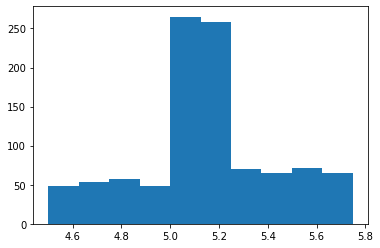

In [310]:
plt.hist(arr[:,0])

(array([ 60.,  56.,  57.,  62.,  64., 177., 157., 132., 104., 131.]),
 array([30.04422494, 33.03898562, 36.0337463 , 39.02850698, 42.02326767,
        45.01802835, 48.01278903, 51.00754971, 54.0023104 , 56.99707108,
        59.99183176]),
 <a list of 10 Patch objects>)

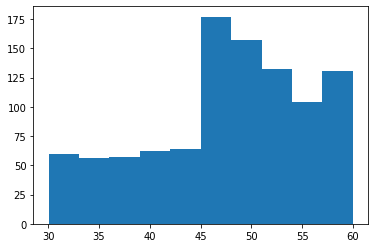

In [311]:
plt.hist(arr[:,1])

In [312]:
def reward():
    action = agent_action(arr)
    array = np.zeros(1000)
    ans = np.where(action == label , 1 ,array)
    return ans.mean() * 100

In [313]:
reward()

50.1